In [1]:
import pandas as pd
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA

In [ ]:
df_snp = pd.read_csv("./ceph_hgdp_minor_code_XNA.betterAnnotated.csv")
df_snp

In [4]:
df_info = pd.read_csv("C:/Users/72915/Desktop/ceph_hgdp_minor_code_XNA.sampleInformation.csv")
df_info

,ID,Gender,Population,Geographic.origin,Geographic.area,region,distance,latitude,longtitude
0,HGDP00448,M,Biaka Pygmies,Central African Republic,Central Africa,Africa,2384.859098,4.0,17.0
1,HGDP00479,M,Biaka Pygmies,Central African Republic,Central Africa,Africa,2384.859098,4.0,17.0
2,HGDP00985,M,Biaka Pygmies,Central African Republic,Central Africa,Africa,2384.859098,4.0,17.0
3,HGDP01094,M,Biaka Pygmies,Central African Republic,Central Africa,Africa,2384.859098,4.0,17.0
4,HGDP00982,M,Mbuti Pygmies,Democratic Republic of Congo,Central Africa,Africa,1335.495772,1.0,29.0
...,...,...,...,...,...,...,...,...,...
1038,HGDP00953,M,Yakut,Siberia,Russia,East Asia,9919.809481,63.0,129.5
1039,HGDP01070,F,Sardinian,Italy,Southern Europe,Europe,5305.809561,40.0,9.0
1040,HGDP01376,M,French Basque,France,Southern Europe,Europe,6012.260603,43.0,0.0
1041,HGDP00671,M,Sardinian,Italy,Southern Europe,Europe,5305.809561,40.0,9.0


In [5]:
region_info = df_info['region'].unique()
# region_info
Geographic_area = df_info['Geographic.area'].unique()
# Geographic_area
Geographic_coordinate = df_info[['latitude','longtitude']].values
Geographic_population = df_info['Population'].unique()
Geographic_origin = df_info['Geographic.origin'].unique()
population = df_info['Population'].unique()
np.shape(population)



(51,)

In [6]:
info_index = df_info.replace({'Africa':1, 'Middle East':2, 'Central/South Asia':3, 'East Asia':4, 'Oceania':5, 'Europe':6, 'America':7})['region'].values
region_index = df_info['region'].values

In [7]:
X_train = df_snp.values[:,3:].transpose()

## PCA

In [7]:
pca = PCA(n_components = 2)
pca.fit(X_train)
X_pca = pca.transform(X_train)

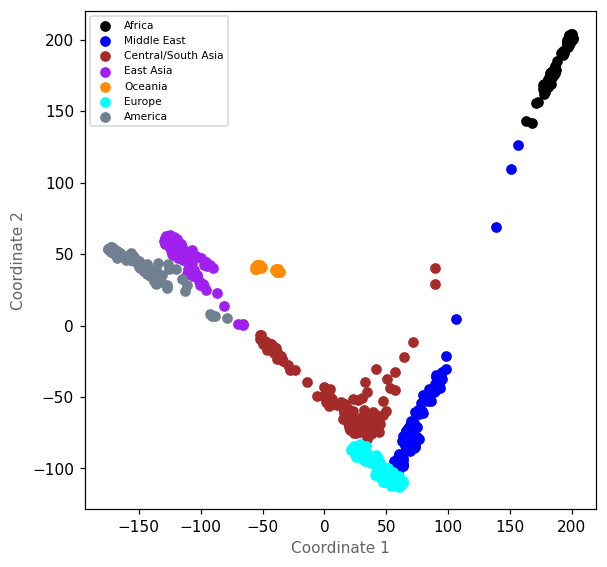

In [8]:
colors = np.array([
    '#000000', '#0000FF', '#A52A2A', '#A020F0', '#FF8C00', '#00FFFF',
    '#708090'])
fig, ax = plt.subplots(figsize=(6, 6), dpi=110)
for i, c, region in zip(range(1,8), colors, region_info):
    plt.scatter(X_pca[info_index == i,0], X_pca[info_index == i,1], c=c, label=region)

ax.set_xlabel(f'Coordinate 1', color='#646369', fontsize=10)
ax.set_ylabel(f'Coordinate 2', color='#646369', fontsize=10)
plt.legend(loc = 'upper left',fontsize = 'x-small')
plt.show()

## MDS

In [9]:
from sklearn.manifold import MDS

In [10]:
mds = MDS(2)
mds.fit(X_train)
X_mds = mds.fit_transform(X_train)

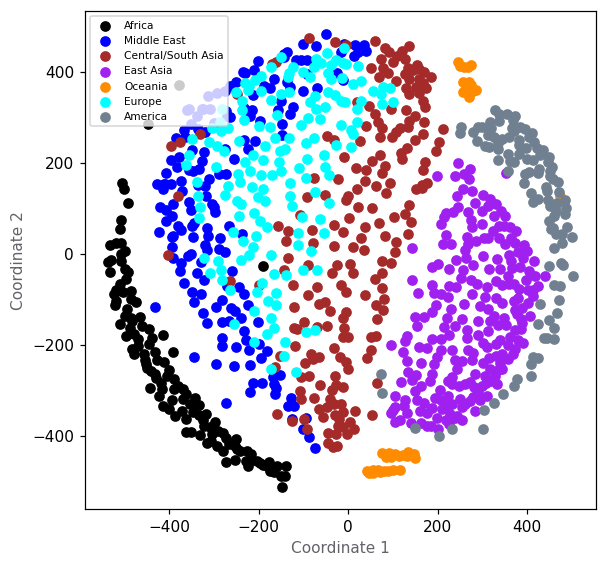

In [11]:
colors = np.array([
    '#000000', '#0000FF', '#A52A2A', '#A020F0', '#FF8C00', '#00FFFF',
    '#708090'])
fig, ax = plt.subplots(figsize=(6, 6), dpi=110)
for i, c, region in zip(range(1,8), colors, region_info):
    plt.scatter(X_mds[info_index == i,0], X_mds[info_index == i,1], c=c, label=region)

ax.set_xlabel(f'Coordinate 1', color='#646369', fontsize=10)
ax.set_ylabel(f'Coordinate 2', color='#646369', fontsize=10)
plt.legend(loc = 'upper left',fontsize = 'x-small')
plt.show()

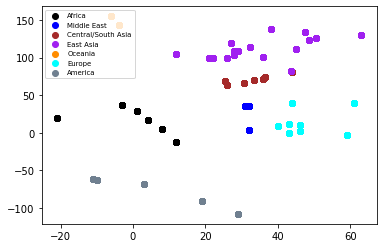

In [12]:
colors = np.array([
    '#000000', '#0000FF', '#A52A2A', '#A020F0', '#FF8C00', '#00FFFF',
    '#708090'])
# fig, ax = plt.subplots(figsize=(6, 6), dpi=110)
for i, c, region in zip(range(1,8), colors, region_info):
    plt.scatter(Geographic_coordinate[info_index == i,0],Geographic_coordinate[info_index == i,1], c=c, label=region)
                
ax.set_xlabel(f'Coordinate 1', color='#646369', fontsize=10)
ax.set_ylabel(f'Coordinate 2', color='#646369', fontsize=10)
plt.legend(loc = 'upper left',fontsize = 'x-small')
plt.show()

# ISOMAP

In [7]:
from sklearn.manifold import Isomap

In [ ]:
# n_neighbors = 10
isomap_embedding = Isomap(n_neighbors=3, n_components=2)
isomap_embedding.fit(X_train)
X_isomap = isomap_embedding.transform(X_train)

# TsnE

In [8]:
from sklearn.manifold import TSNE

In [ ]:
tsne_embedding = TSNE(2)
tsne_embedding.fit(X_train)
X_tsne = tsne_embedding.transform(X_train)